**Import the dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Dots Potential Customer Survey Data.xlsx'
df = pd.read_excel(file_path)

print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working

**Identify and handle missing values**

In [4]:
# Check for missing values
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values in Each Column:
Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorce

**Explore the data**

In [5]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check data types and unique values for each column
print("\nData Types and Unique Values:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Summary Statistics:
          Unique ID          Age  Annual Family Income ($)  \
count  3.220000e+03  3220.000000               3220.000000   
mean   4.988139e+06    44.834161              20578.639130   
std    2.867911e+06    19.073161              15079.429422   
min    1.683000e+03    13.000000                 10.000000   
25%    2.516499e+06    29.000000               8494.000000   
50%    5.041256e+06    44.000000              16982.000000   
75%    7.459871e+06    60.000000              30965.250000   
max    9.999011e+06    91.000000              59858.000000   

       Time spent watching videos/TV  Time spent playing indoor sports  \
count                    3220.000000                       3220.000000   
mean                        4.347205                          1.991925   
std                         2.807803                          1.205222   
min                         0.000000                          0.000000   
25%                         2.000000              

**Analyse feature distribution**

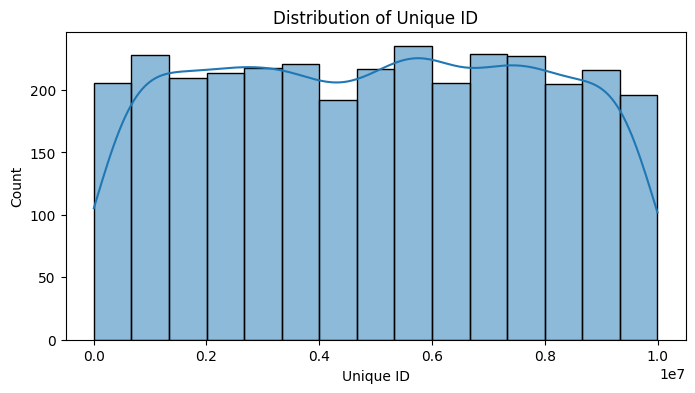

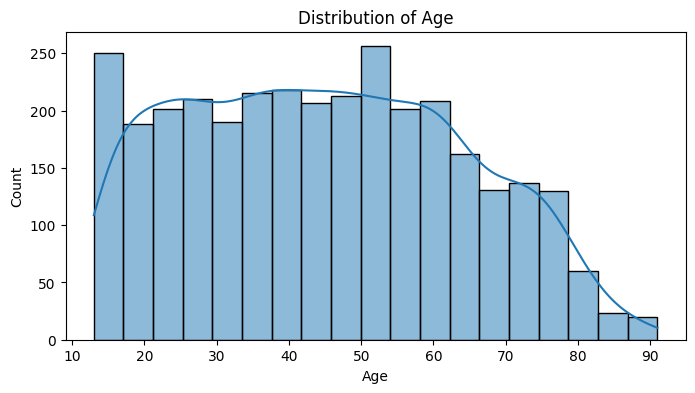

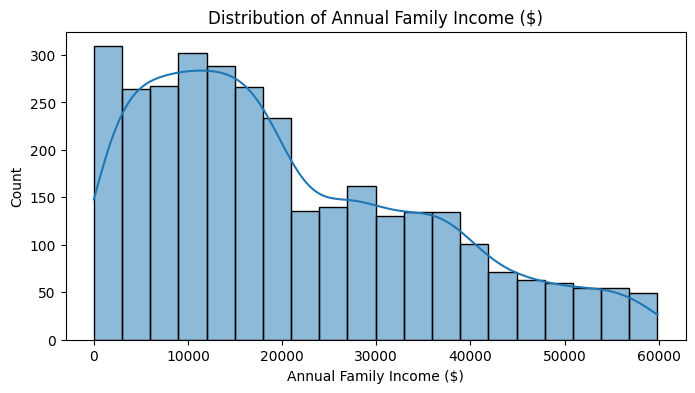

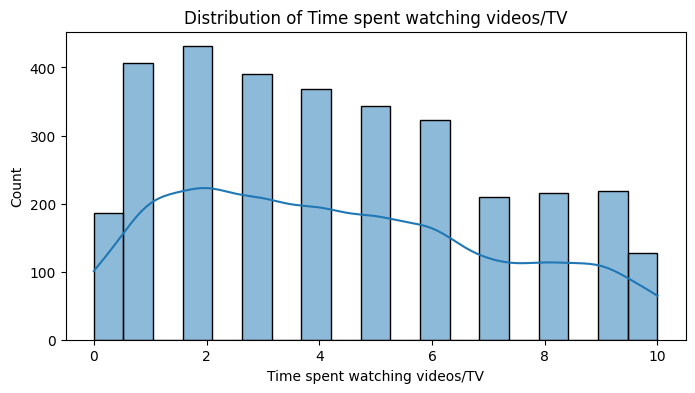

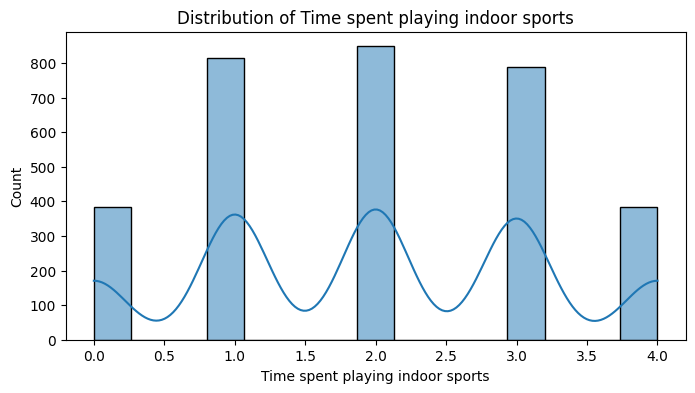

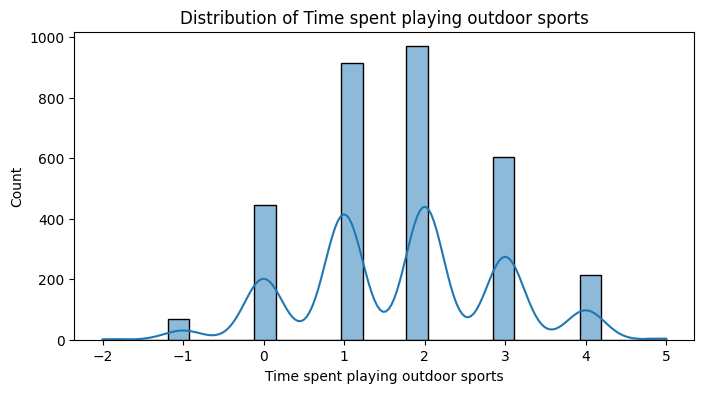

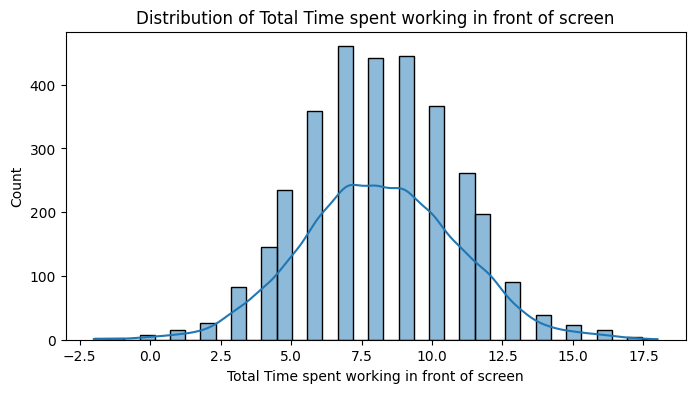

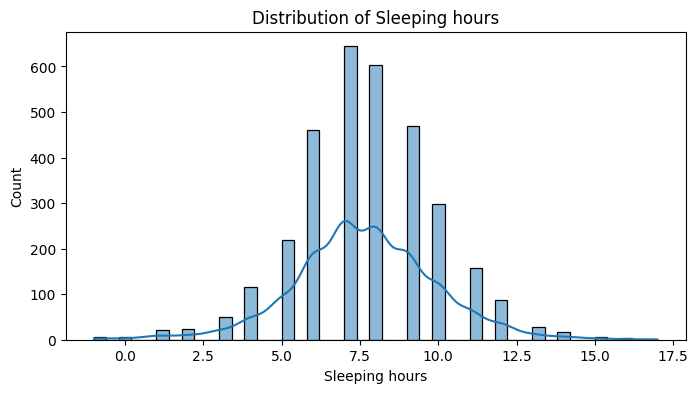

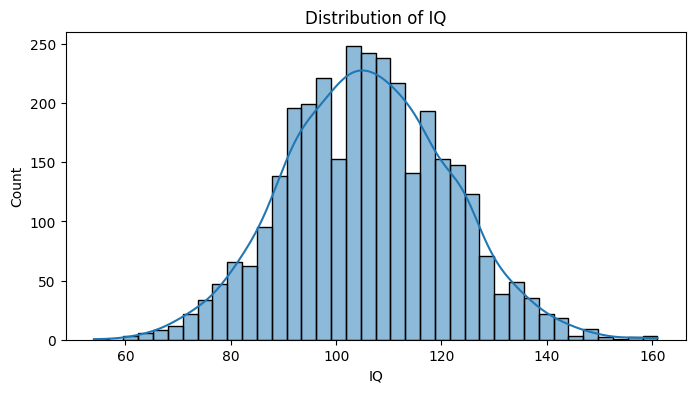

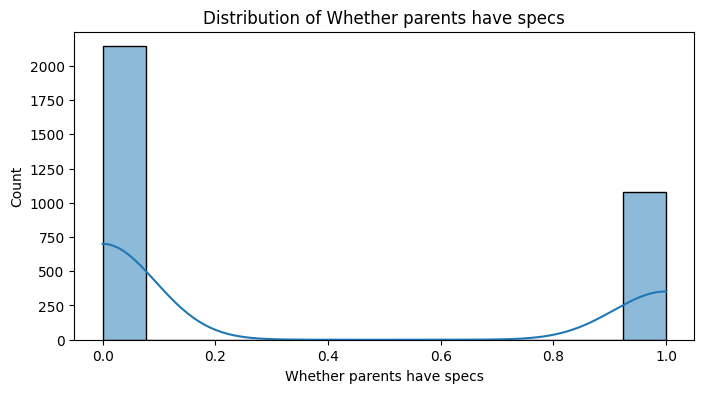

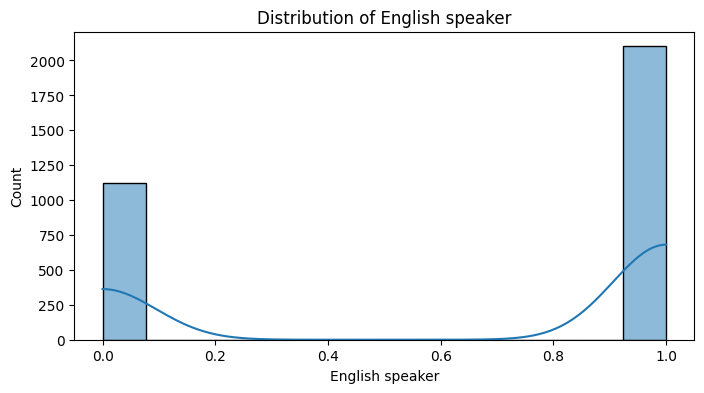

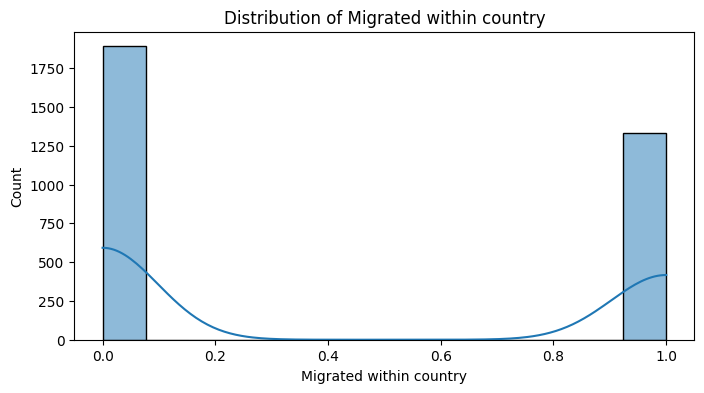

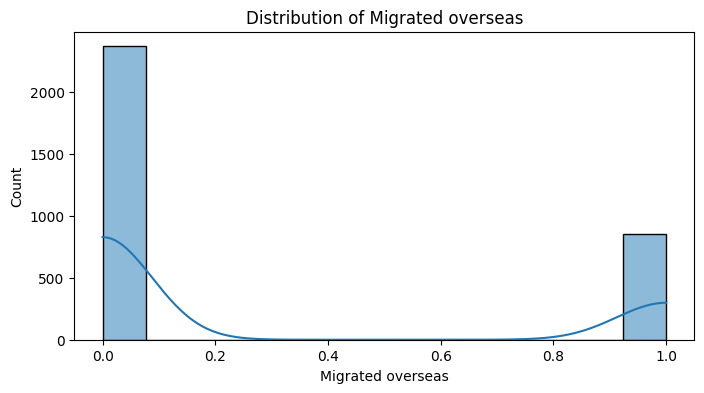

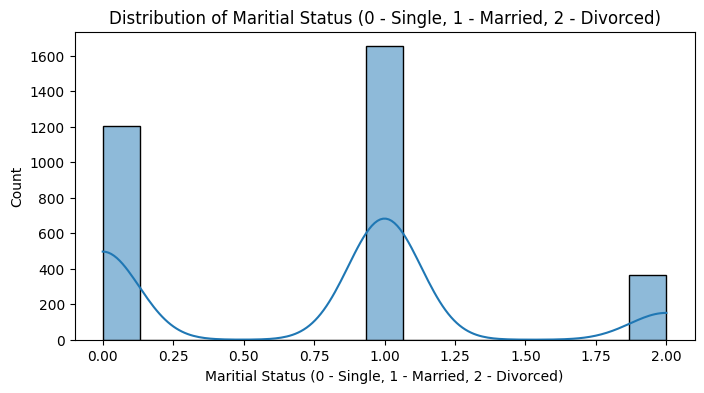

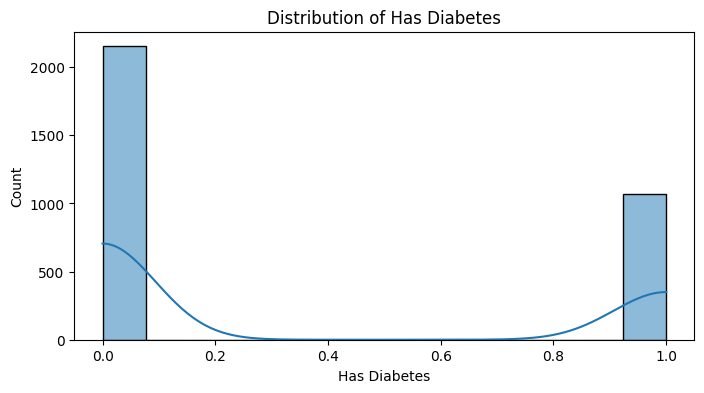

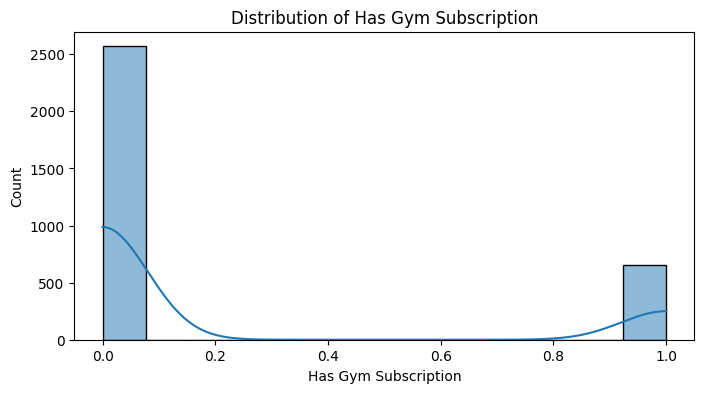

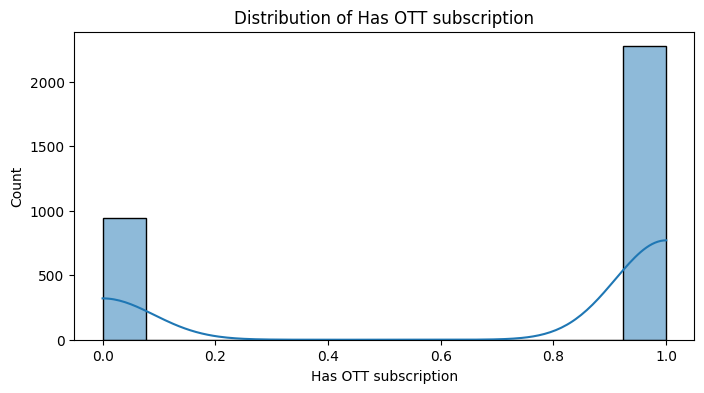

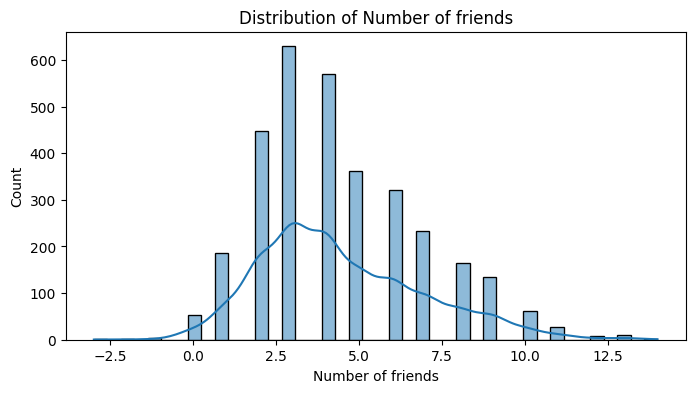

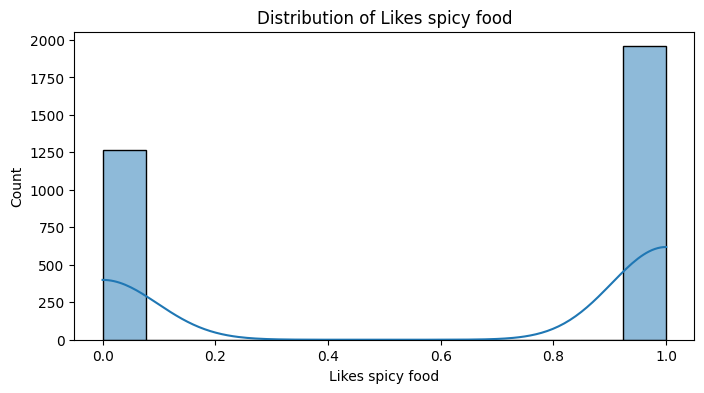

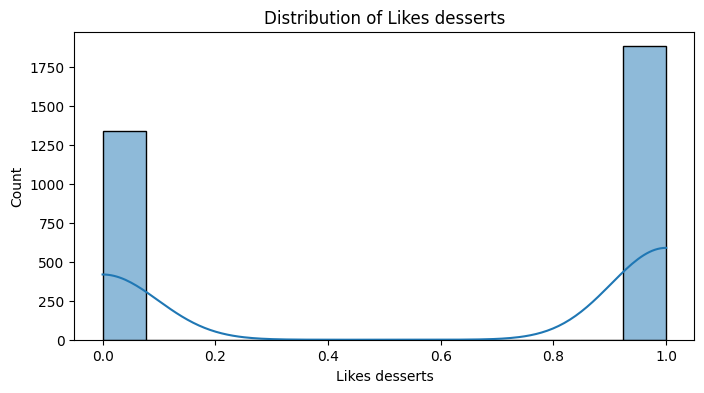

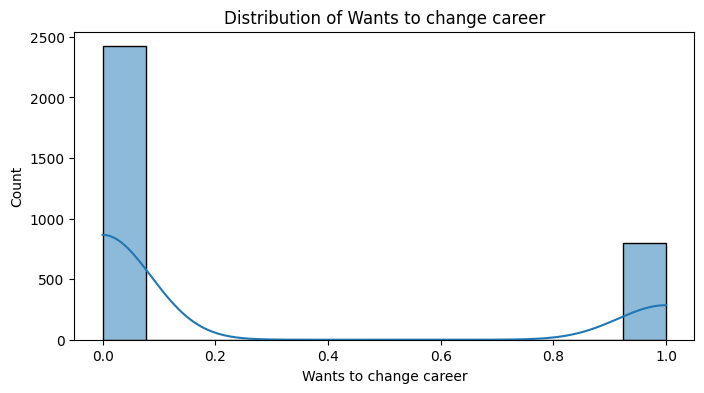

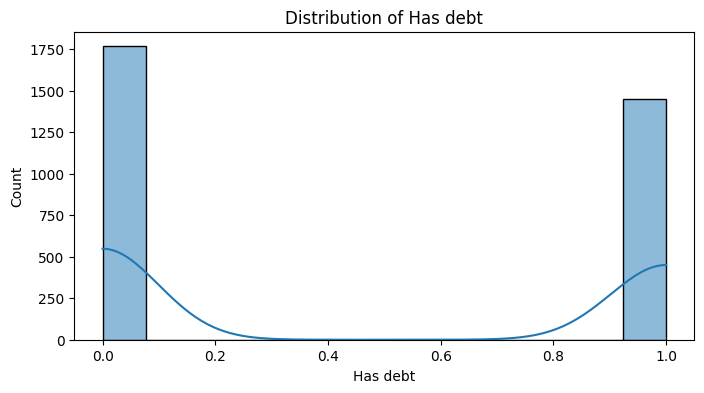

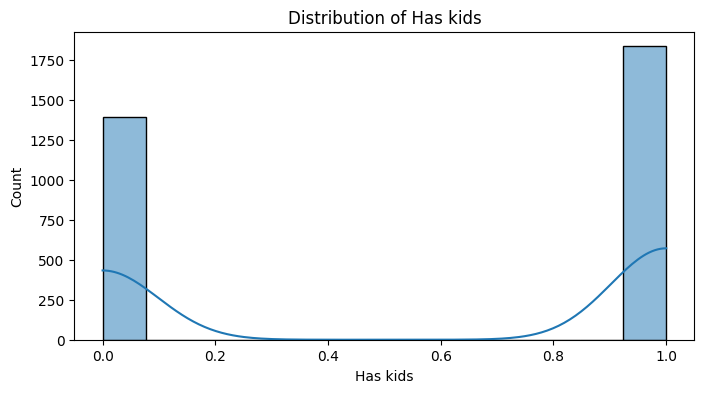

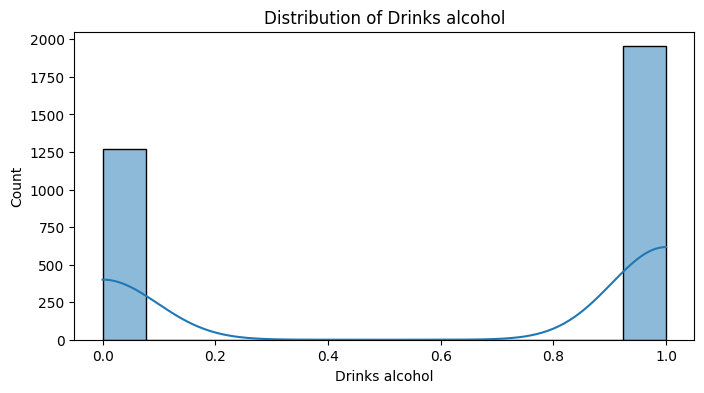

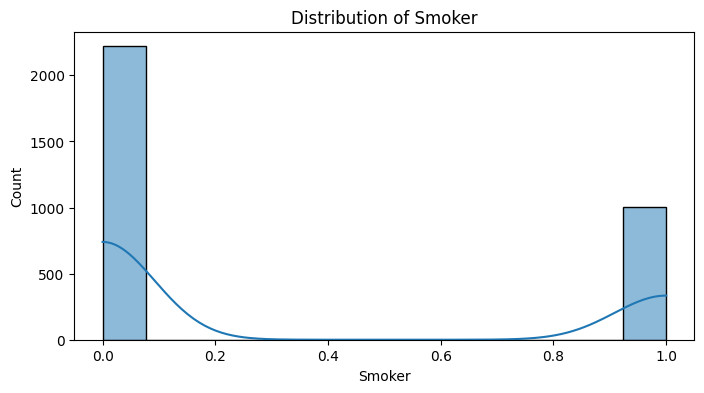

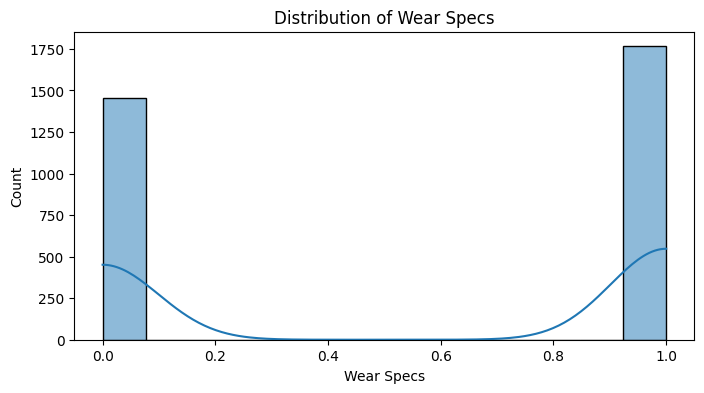

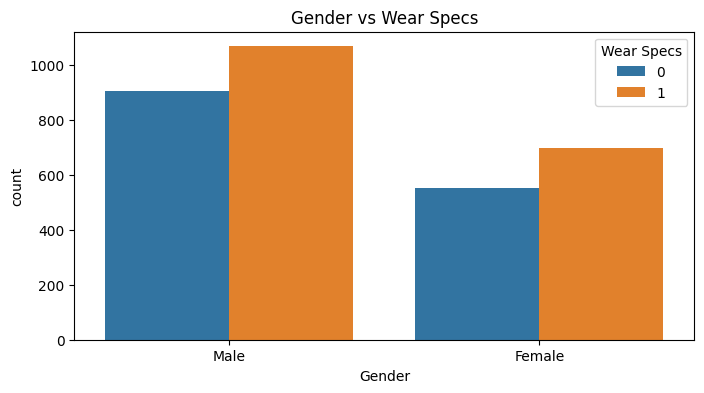

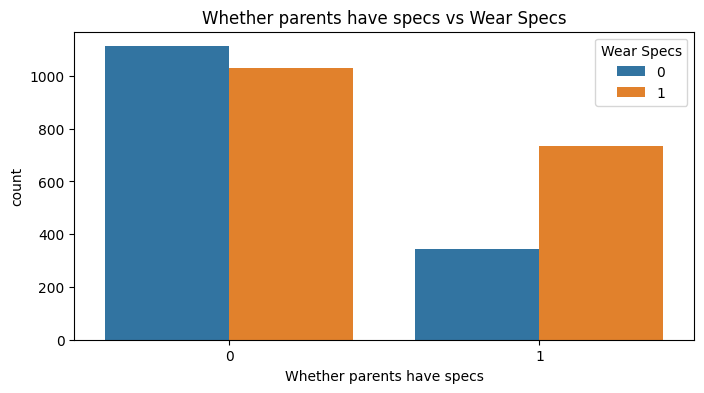

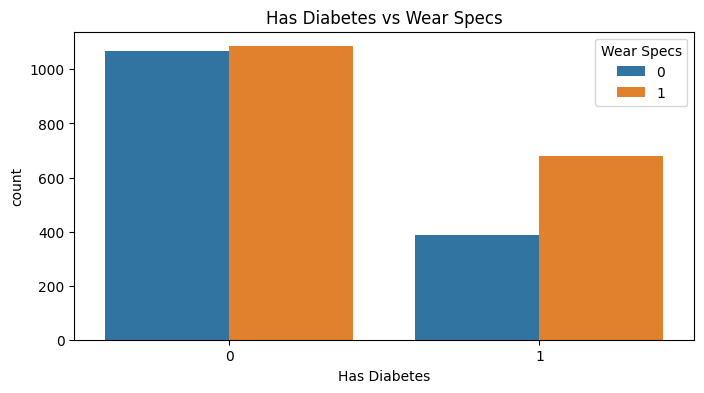

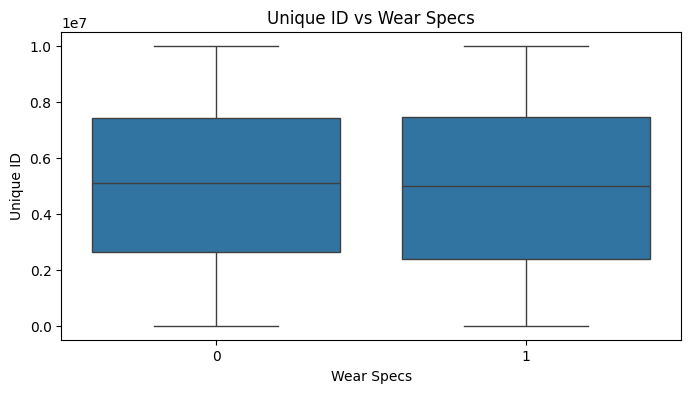

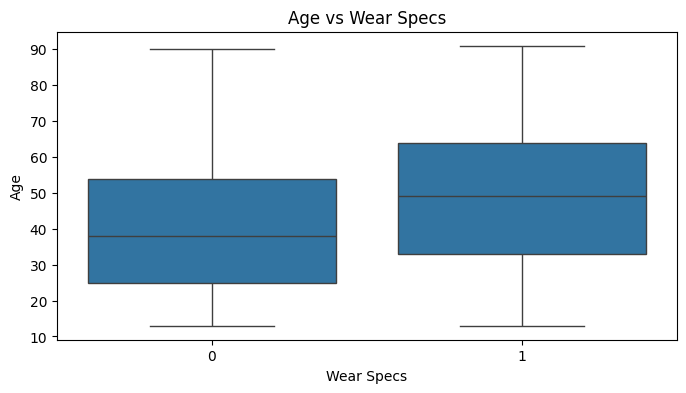

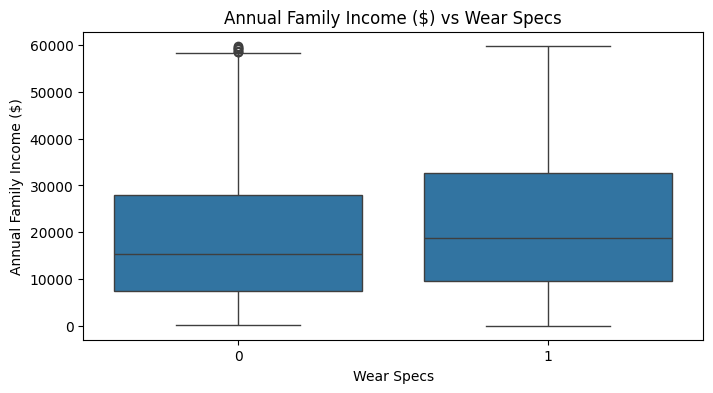

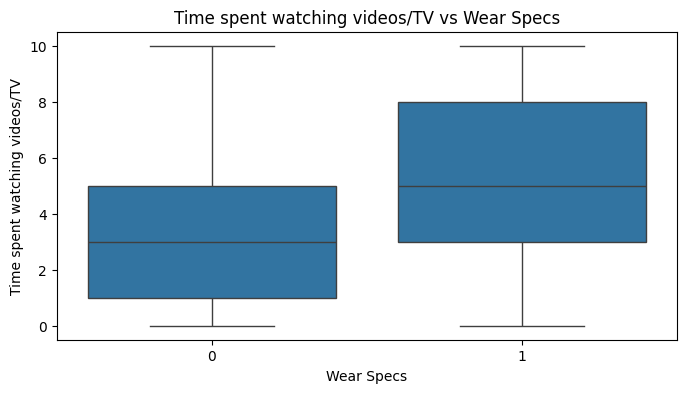

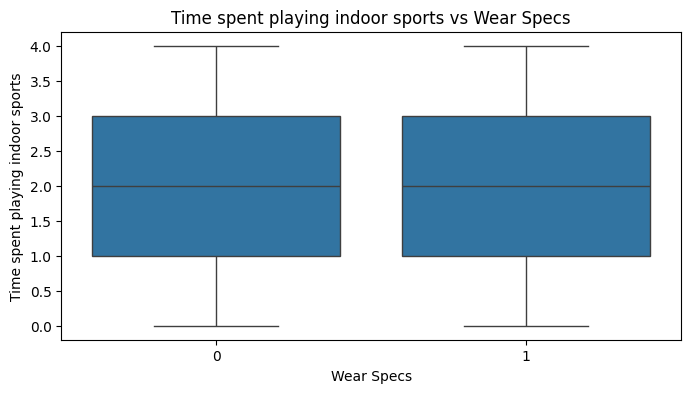

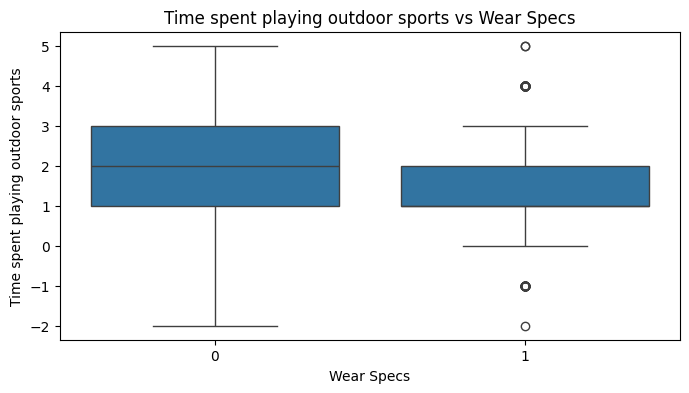

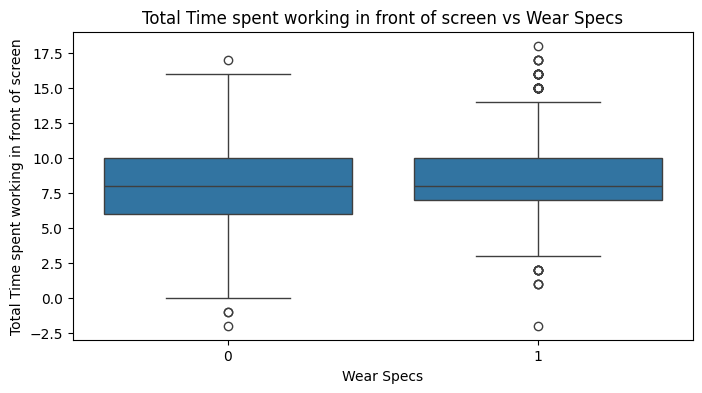

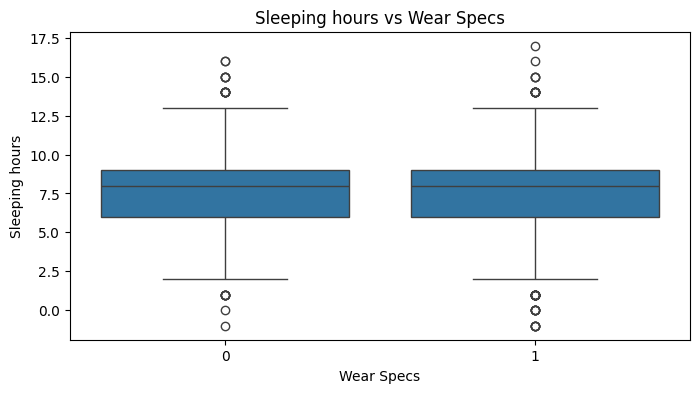

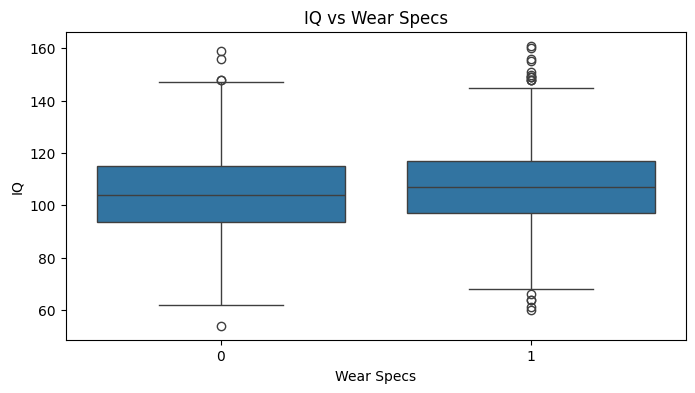

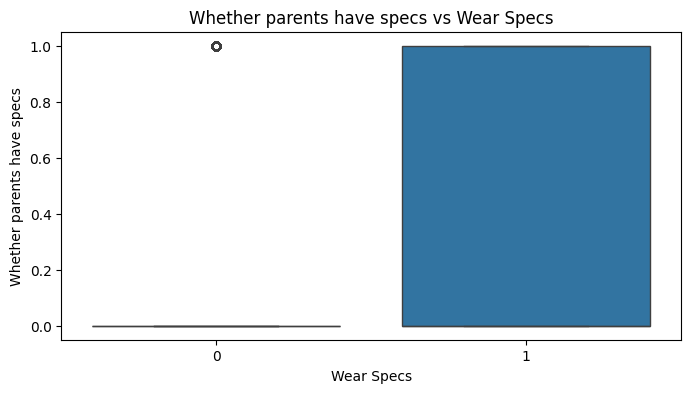

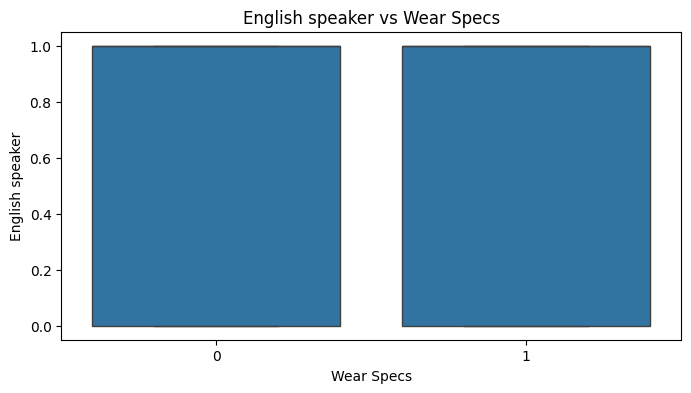

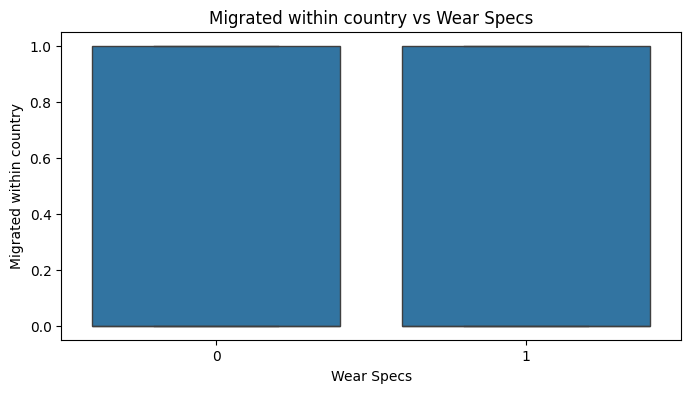

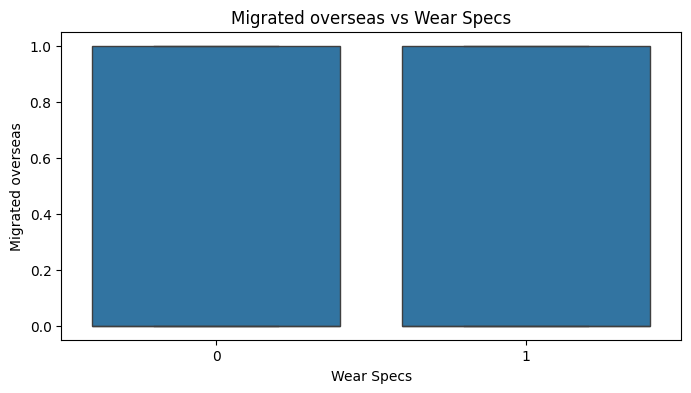

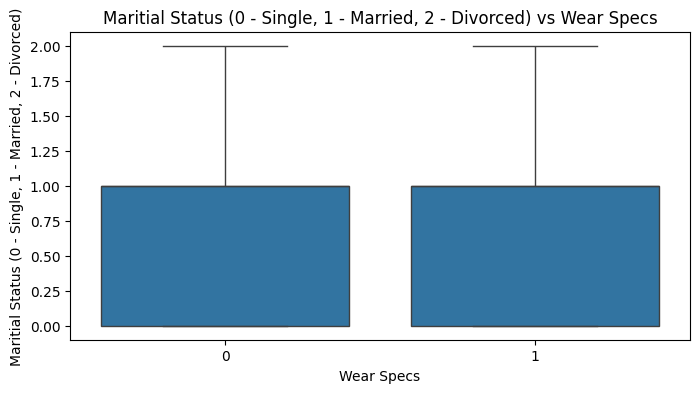

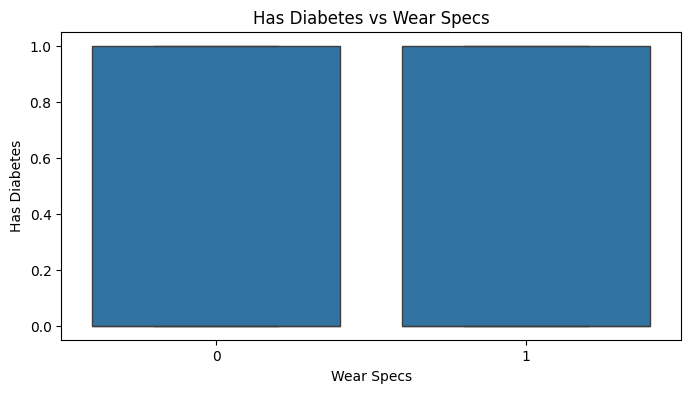

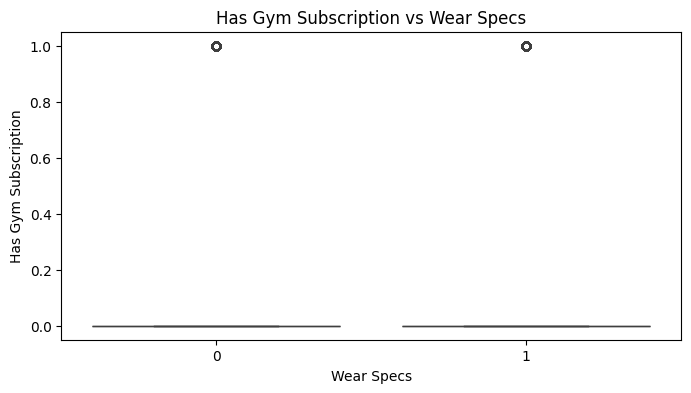

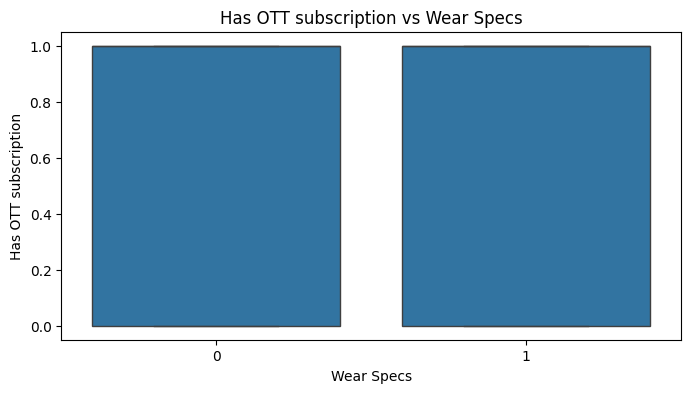

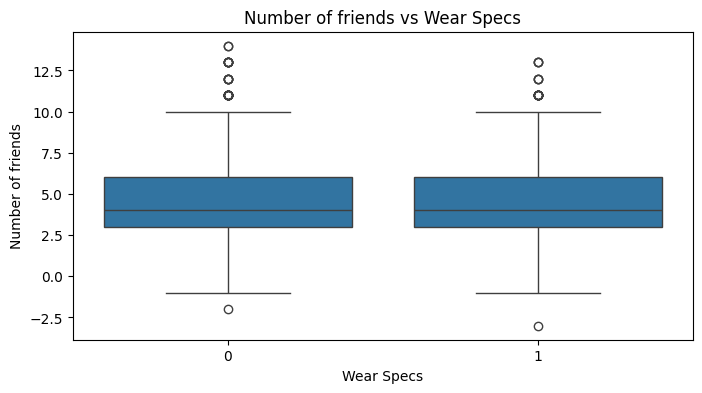

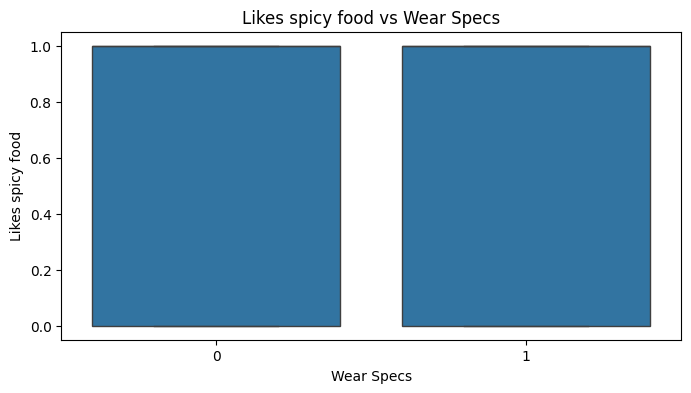

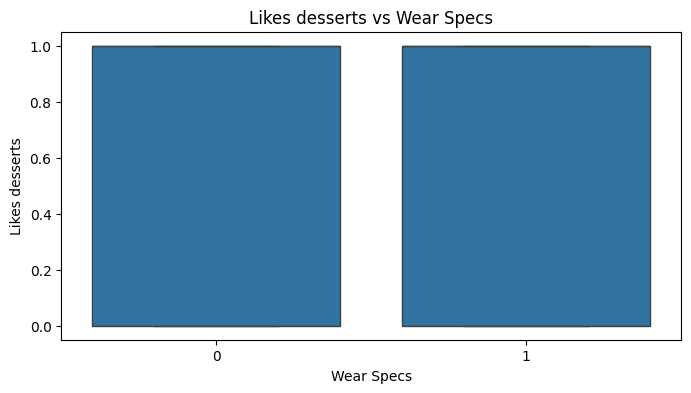

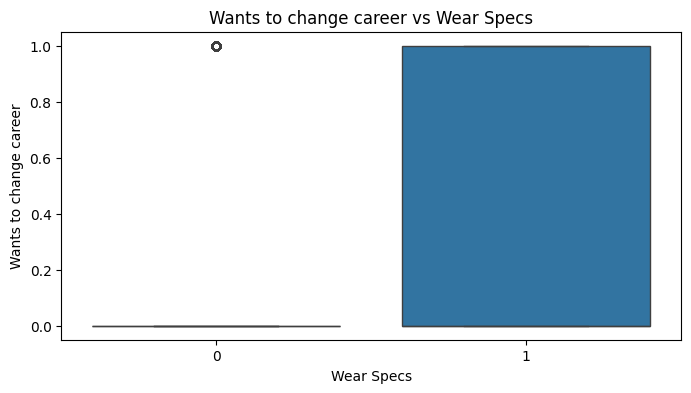

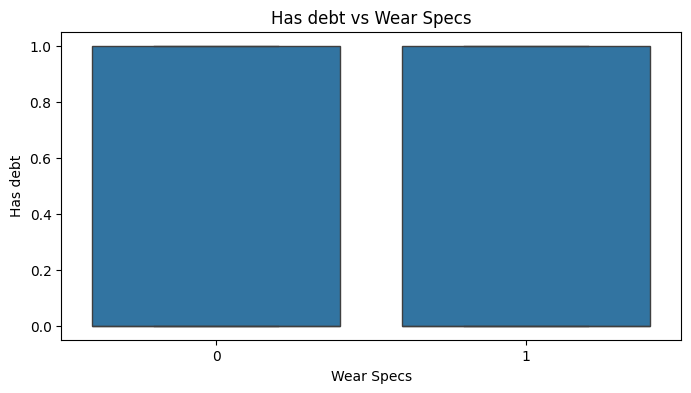

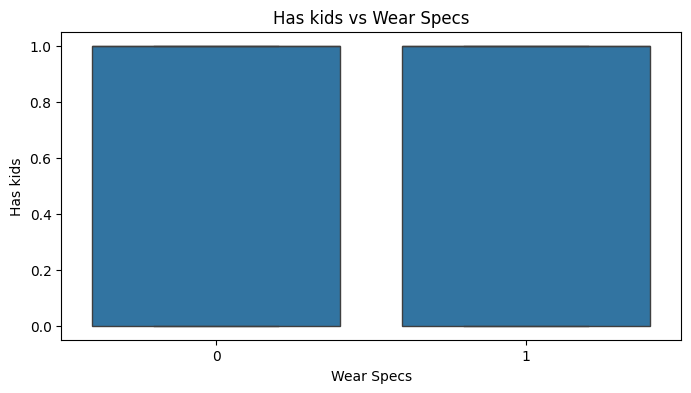

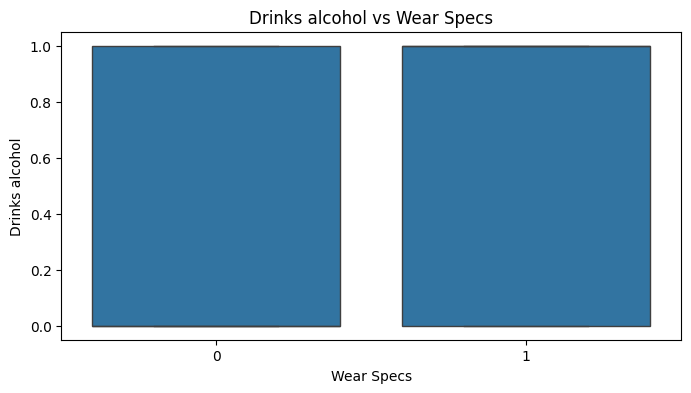

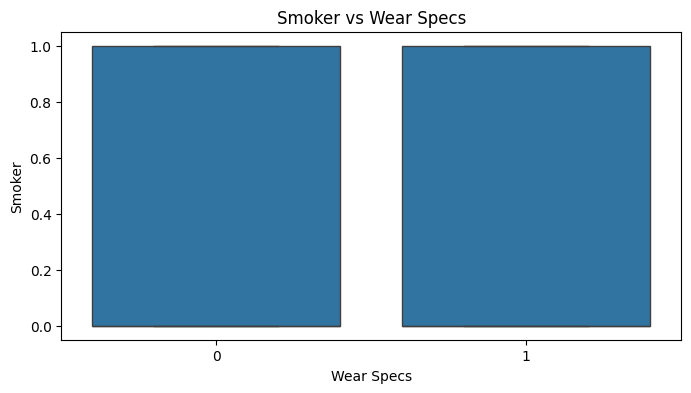

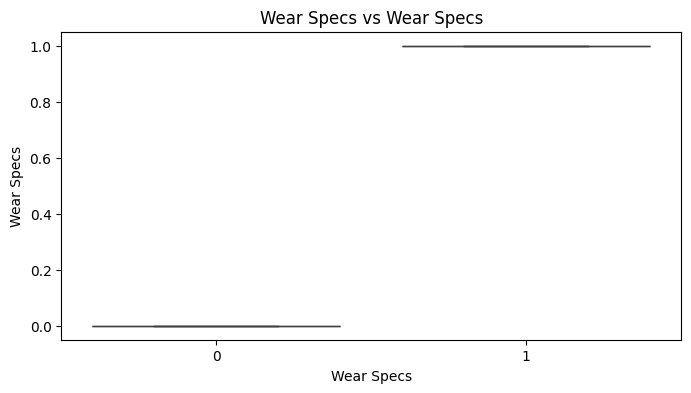

In [7]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Relationship with Target Variable (Wear Specs)
target = 'Wear Specs'

# Categorical Features
categorical_features = ['Gender', 'Whether parents have specs', 'Has Diabetes']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue=target)
    plt.title(f'{feature} vs {target}')
    plt.show()

# Numerical Features
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f'{col} vs {target}')
    plt.show()
